**Name:** Komal P. Badhe

**Roll no:** 20013069

**Class:** TE-IT

#Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading the dataset

In [ ]:
air_data = pd.read_csv("/content/drive/MyDrive/air_data.csv");
air_data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,41.0,190.0,7.4,67.0,5.0,1.0
2,2.0,36.0,118.0,8.0,72.0,5.0,2.0
3,3.0,12.0,149.0,12.6,74.0,5.0,3.0
4,4.0,18.0,313.0,11.5,62.0,5.0,4.0
...,...,...,...,...,...,...,...
105,105.0,28.0,273.0,11.5,82.0,8.0,13.0
106,106.0,65.0,157.0,9.7,80.0,8.0,14.0
107,107.0,NaN,64.0,11.5,79.0,8.0,15.0
108,108.0,22.0,71.0,10.3,77.0,8.0,16.0


#Data preparation

In [ ]:
air_data.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [ ]:
air_data.shape

(110, 7)

In [ ]:
air_data.isnull().sum()

Unnamed: 0     2
Ozone         36
Solar.R        9
Wind           2
Temp           2
Month          2
Day            2
dtype: int64

In [ ]:
ozone_mean=air_data['Ozone'].mean()
air_data['Ozone']= air_data['Ozone'].fillna(ozone_mean) 


solar_mean = air_data['Solar.R'].mean()
air_data['Solar.R'] = air_data['Solar.R'].fillna(solar_mean)

In [ ]:
air_data.isnull().sum()

Unnamed: 0    2
Ozone         0
Solar.R       0
Wind          2
Temp          2
Month         2
Day           2
dtype: int64

In [ ]:
air_data.shape

(110, 7)

In [ ]:
airD = air_data.dropna()
airD.shape

(108, 7)

**Deviding dataset in test data and train data**

In [ ]:
#X=adata[['Month','Solar.R','Wind','Temp']]

X=airD[['Wind','Temp']]
Y= airD[['Ozone']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print("Length of x_train = ",len(x_train))
print("Length of x_test = ",len(x_test))
print("Length of y_train = ",len(y_train))
print("Length of y_test = ",len(y_test))

Length of x_train =  81
Length of x_test =  27
Length of y_train =  81
Length of y_test =  27


**Fitting data in the model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(x_train, y_train)

reg.score(x_train,y_train)

0.4012730612090153

**Prediction of the Data**

In [ ]:
y_train_pred = reg.predict(x_train).sum(axis=1)
y_train_pred

array([63.1476314 , 22.97504052, 36.0100912 , 62.3382256 , 59.95446677,
       36.54381062, 14.48063881, 45.26944015, 49.19638768, 34.31565671,
       50.38826709, 16.43746547, 55.38265345, 41.61817901, 47.92888536,
       55.61388128, 24.04683849, 60.45702184, 52.84764882, 47.19510247,
       10.98062346, 53.61259607, 63.72580936, 26.35497442, 25.2387179 ,
       25.3143408 , 56.37882852, 46.76817029,  6.90243014, 69.99205717,
       33.70195527, 29.31691122,  1.24988378, 20.59128169, -3.47317533,
       62.45830705, -3.16632461, 56.80576069, 31.77629295, 63.53010502,
       55.1869491 , 57.11261142, 50.92198651, 40.42629959, 34.31565671,
       29.54813905, 68.49332703, 66.22964964, 44.42887001, 57.18823431,
       59.11389663, 42.04511118, 30.20193991, 37.20197062, 36.85066134,
       34.69813034, 39.61689379, 63.95703719, 29.54813905, 49.27201057,
       49.27201057, 49.15192913, 56.0719778 , 58.76258735, 41.6938019 ,
       62.99202646, 20.31995444, 32.00752078, 18.0874414 , 47.88

In [ ]:
y_test_pred = reg.predict(x_test).sum(axis=1)

y_test_pred

array([47.57757609, 46.96387464,  6.09302434, 44.42887001, 54.03952824,
       68.37324558, 48.03567261, 40.85323176, 61.26642763, 33.65749671,
       46.96387464, 67.18136616, 37.30875786, 48.00450826, 27.74255818,
       71.56641021, 48.8450784 , 55.30703055, 40.85323176, 62.38268415,
       31.39381933, 33.50625092, 48.38698188, 23.81561066, 24.12246138,
       47.27072536,  8.36999594])

#Correlation matrix

In [ ]:
matrix = air_data.corr()

matrix

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
Unnamed: 0,1.000000,0.426854,-0.041716,-0.299195,0.709330,0.961619,0.072816
Ozone,0.426854,1.000000,0.325547,-0.463648,0.572369,0.425781,-0.021795
Solar.R,-0.041716,0.325547,1.000000,-0.048794,0.289614,0.006278,-0.168179
Wind,-0.299195,-0.463648,-0.048794,1.000000,-0.401515,-0.302494,0.030999
Temp,0.709330,0.572369,0.289614,-0.401515,1.000000,0.735921,-0.146081
Month,0.961619,0.425781,0.006278,-0.302494,0.735921,1.000000,-0.203542
Day,0.072816,-0.021795,-0.168179,0.030999,-0.146081,-0.203542,1.000000


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns;

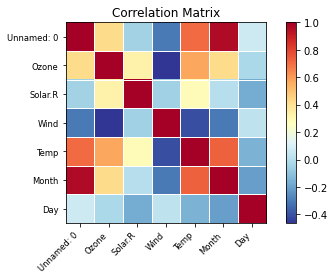

In [ ]:
sm.graphics.plot_corr(matrix,xnames = list(matrix.columns))
plt.show()

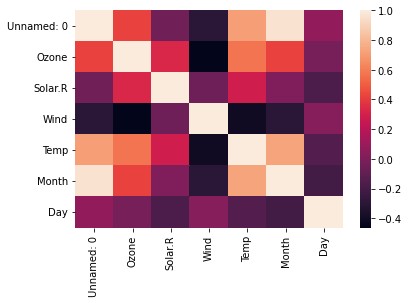

In [ ]:
hmap = sns.heatmap(matrix)

# R2

In [ ]:
from sklearn.metrics import r2_score

print('R^2 train: ', r2_score(y_train, y_train_pred))
print('R^2 test: ', r2_score(y_test, y_test_pred))

R^2 train:  0.4012730612090153
R^2 test:  0.32824702696228314


#MSE

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_train_pred)
print('MSE train: ', mean_squared_error(y_train, y_train_pred))
print('MSE test: ', mean_squared_error(y_test, y_test_pred))

MSE train:  467.35486999346057
MSE test:  314.98273140874227


#RMSE

In [ ]:
import math

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
rmse1 = math.sqrt(mse)

rmse

21.618391938196066

#Regression Coefficent 

In [ ]:
print('Regression Coefficients: ', reg.coef_) 

Regression Coefficients:  [[-2.62392173  1.19187942]]


#Regression Intercept

In [ ]:
print('Regression intercept : ',reg.intercept_)

Regression intercept :  [-23.13014223]


#Summary

In [ ]:
import statsmodels.api as sm
res=sm.OLS(Y,X).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Ozone   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                              250.4
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    6.96e-41
Time:                        07:33:23   Log-Likelihood:                         -481.58
No. Observations:                 108   AIC:                                      967.2
Df Residuals:                     106   BIC:                                      972.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------